In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [31]:
benchmark_df = pd.read_json("benchmark.jsonl", lines=True)
benchmark_df = benchmark_df[["task_id", "approx_token_count"]]
benchmark_df.head()

,task_id,approx_token_count
0,LongBench_HumanEval/100_0_first half,0
1,LongBench_HumanEval/100_0_second half,0
2,LongBench_HumanEval/13_0_first half,0
3,LongBench_HumanEval/13_0_second half,0
4,LongBench_HumanEval/152_0_first half,0


In [32]:
executions_df = pd.read_json("executions_starcoderbase15b.jsonl", lines=True)
executions_df.head()

,task_id,executions
0,LongBench_HumanEval/100_0_first half,"[{'program': ' def make_a_pile(n): """""" ..."
1,LongBench_HumanEval/100_0_second half,"[{'program': ' def make_a_pile(n): """""" ..."
2,LongBench_HumanEval/13_0_first half,[{'program': ' def greatest_common_divisor(a:...
3,LongBench_HumanEval/13_0_second half,[{'program': ' def greatest_common_divisor(a:...
4,LongBench_HumanEval/152_0_first half,"[{'program': ' def compare(game,guess): """"..."


In [33]:
def mutant_catch_rate(execution):
    if execution["exit_code"] != 0:
        return 0
    mutants = execution["mutants"]
    caught_mutants = sum(1 for mutant in mutants if mutant["exit_code"] != 0)
    return caught_mutants / len(mutants)

def mean_mutant_catch_rate(executions):
    n = len(executions)
    if n == 0:
        return 0
    return sum(mutant_catch_rate(execution) for execution in executions) / n


def test_suite_success_rate(executions):
    n = len(executions)
    if n == 0:
        return 0
    return sum(1 for execution in executions if execution["exit_code"] == 0) / n

combined_df = pd.merge(benchmark_df, executions_df, on="task_id")
combined_df["mutant_catch_rate"] = executions_df["executions"].apply(mean_mutant_catch_rate)
combined_df["test_suite_success_rate"] = executions_df["executions"].apply(test_suite_success_rate)
combined_df = combined_df[["task_id", "approx_token_count", "mutant_catch_rate", "test_suite_success_rate"]]
combined_df.head()

,task_id,approx_token_count,mutant_catch_rate,test_suite_success_rate
0,LongBench_HumanEval/100_0_first half,0,0.0,0.0
1,LongBench_HumanEval/100_0_second half,0,0.0,0.0
2,LongBench_HumanEval/13_0_first half,0,0.0,0.0
3,LongBench_HumanEval/13_0_second half,0,0.0,0.0
4,LongBench_HumanEval/152_0_first half,0,0.0,0.0


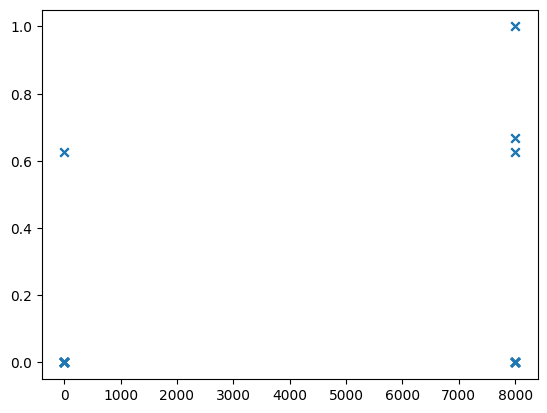

In [34]:
# Plot size on X and pass1 on Y but as a CDF
plt.scatter(combined_df["approx_token_count"], combined_df["mutant_catch_rate"], marker = "x")

In [35]:
combined_df["mutant_catch_rate"].describe()

count    40.000000
mean      0.145833
std       0.303851
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: mutant_catch_rate, dtype: float64

In [36]:
combined_df["test_suite_success_rate"].describe()

count    40.000000
mean      0.200000
std       0.405096
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: test_suite_success_rate, dtype: float64

In [37]:
combined_df[combined_df["approx_token_count"] > 0]["mutant_catch_rate"].describe()

count    20.000000
mean      0.229167
std       0.371327
min       0.000000
25%       0.000000
50%       0.000000
75%       0.625000
max       1.000000
Name: mutant_catch_rate, dtype: float64

In [38]:
combined_df[combined_df["approx_token_count"] == 0]["mutant_catch_rate"].describe()

count    20.000000
mean      0.062500
std       0.192371
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.625000
Name: mutant_catch_rate, dtype: float64

In [40]:
executions_df[executions_df["task_id"] == "LongBench_HumanEval/100_8000_first half"]

,task_id,executions
20,LongBench_HumanEval/100_8000_first half,"[{'program': ' def make_a_pile(n): """""" ..."


In [43]:
benchmark_df = pd.read_json("benchmark.jsonl", lines=True)
benchmark_df = benchmark_df[benchmark_df["humaneval_task_id"] == "HumanEval/100"]

In [44]:
benchmark_df.head()

,prompt,target_function,humaneval_task_id,task_id,approx_token_count,mutants,target_function_name
0,"\ndef make_a_pile(n):\n """"""\n Given a po...","\ndef make_a_pile(n):\n """"""\n Given a po...",HumanEval/100,LongBench_HumanEval/100_0_first half,0,[from typing import List\n\ndef make_a_pile(n:...,make_a_pile
1,"\ndef make_a_pile(n):\n """"""\n Given a po...","\ndef make_a_pile(n):\n """"""\n Given a po...",HumanEval/100,LongBench_HumanEval/100_0_second half,0,[from typing import List\n\ndef make_a_pile(n:...,make_a_pile
20,"def path_sequence(list_of_links, source, targe...","\ndef make_a_pile(n):\n """"""\n Given a po...",HumanEval/100,LongBench_HumanEval/100_8000_first half,8000,[from typing import List\n\ndef make_a_pile(n:...,make_a_pile
21,"def list_to_string(lst):\n """"""Takes a list ...","\ndef make_a_pile(n):\n """"""\n Given a po...",HumanEval/100,LongBench_HumanEval/100_8000_second half,8000,[from typing import List\n\ndef make_a_pile(n:...,make_a_pile
40,"def find_anagrams_in(sentence):\n """"""Find p...","\ndef make_a_pile(n):\n """"""\n Given a po...",HumanEval/100,LongBench_HumanEval/100_64000_first half,64000,[from typing import List\n\ndef make_a_pile(n:...,make_a_pile
